0.9987466045389373
411.83470793619995
0.9901477039832736
3183.4686699244185
0.999807134059808
3189.3394155724304
1.0095354633544766
3195.2209876673237
411.83470793619995
3195.2209876673237
150.13200291236694
1171.558160611862


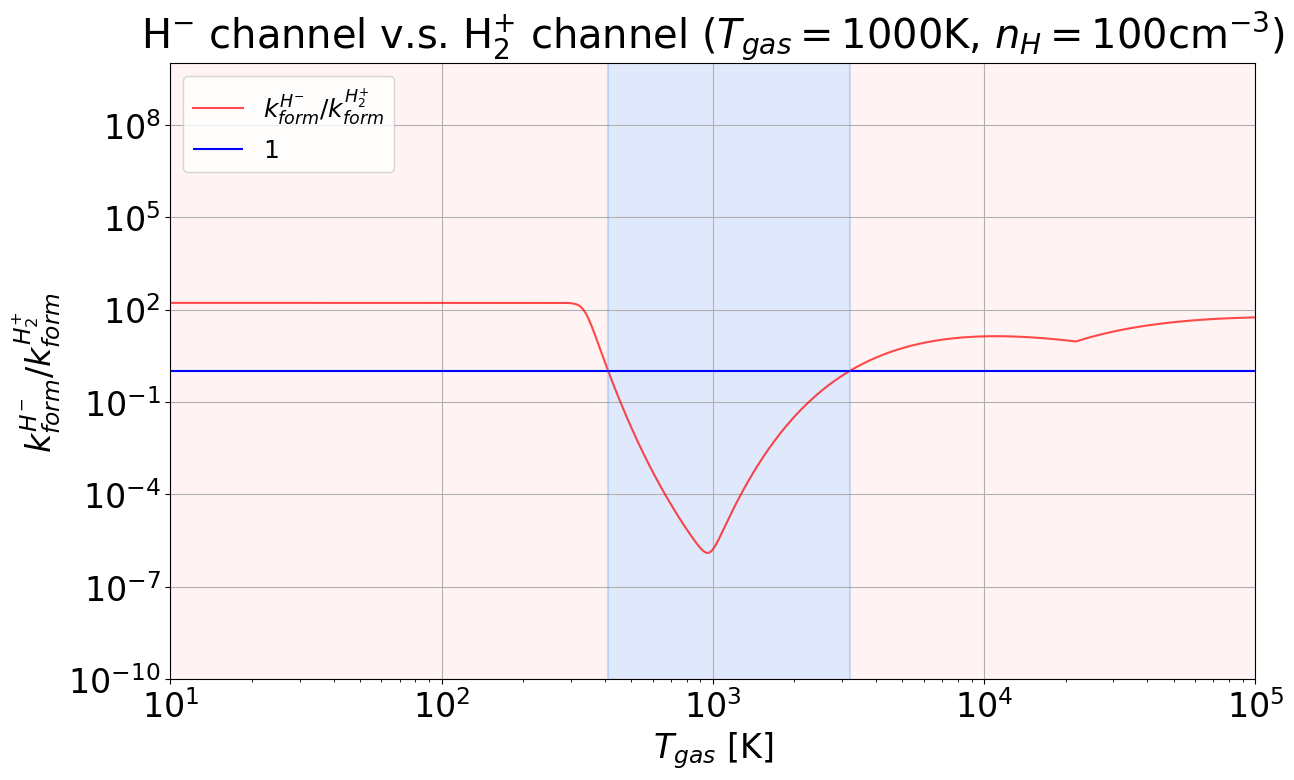

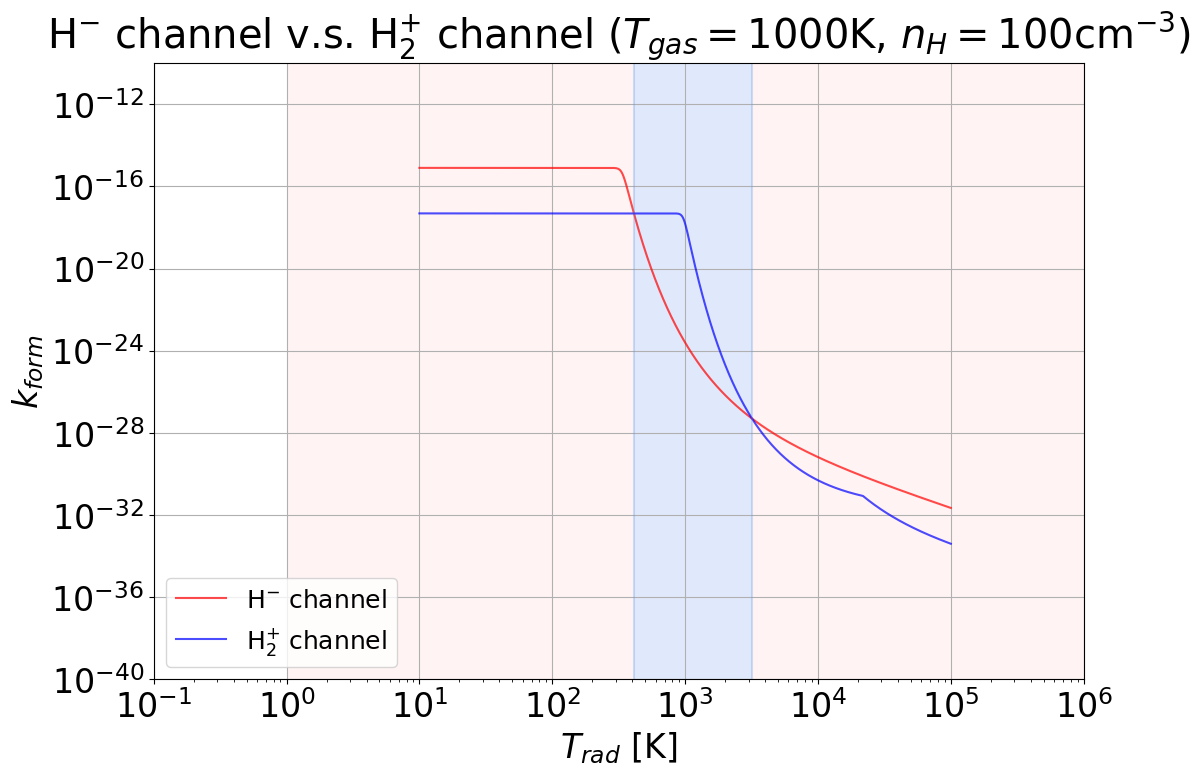

/var/folders/kw/hmy8d3gn14j8321d_1qs3ry40000gn/T/ipykernel_52814/771132011.py:275: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(redshift(1.0e-1),redshift(1.0e6))


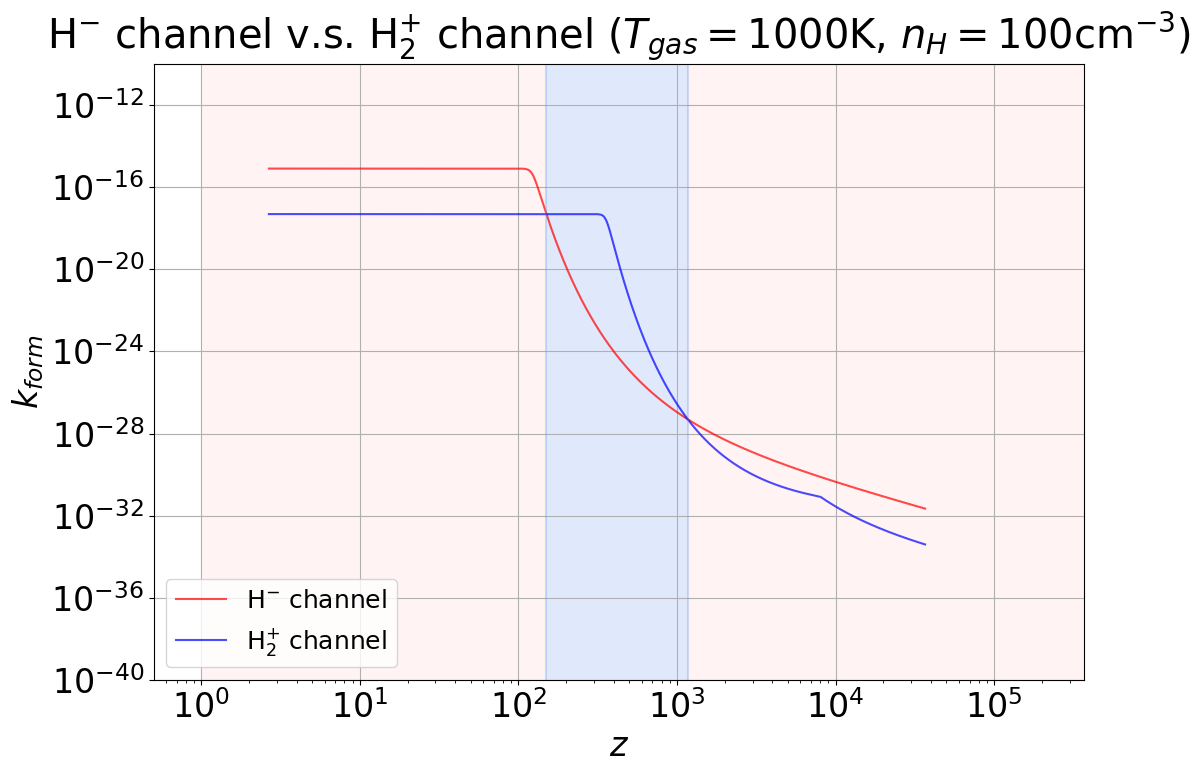

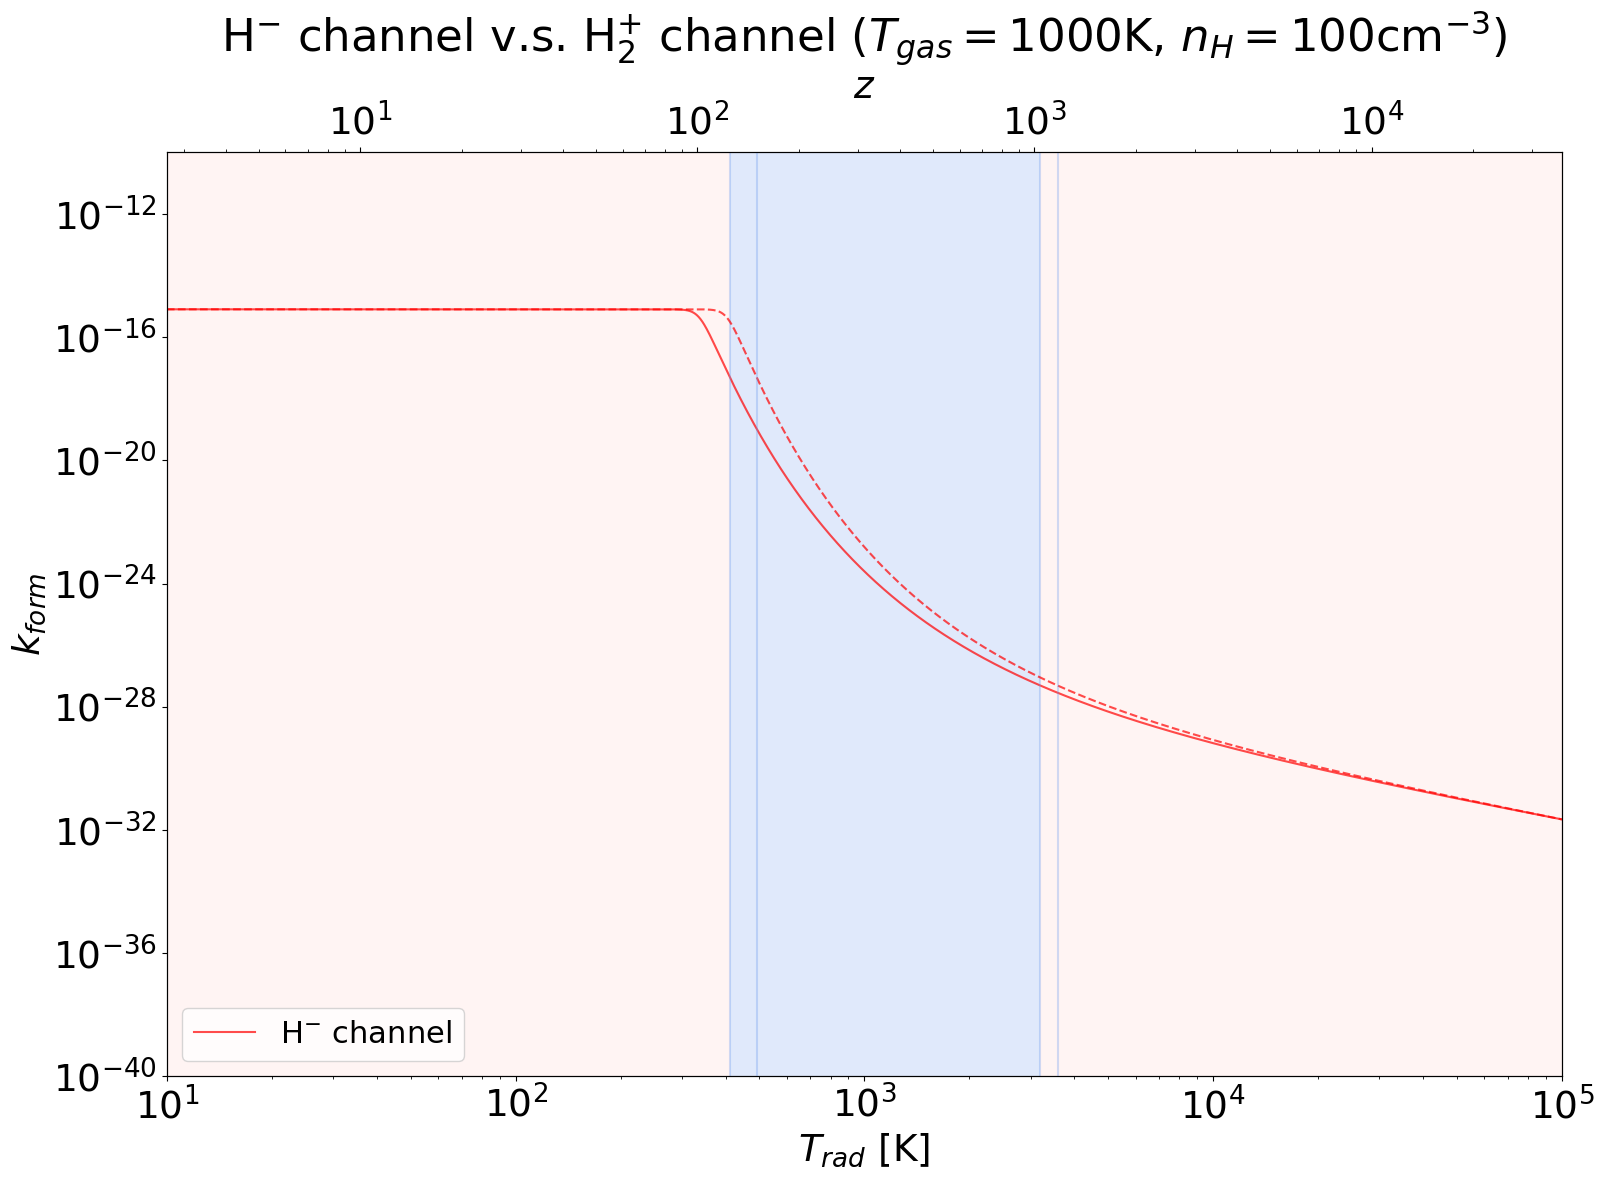

5000 5000
4.5646216587014585 0.4264664910452836 4.1381551676561745
5.0 1.0 4.0


In [92]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 17:32:36 2023
@author: manaito
"""

import numpy as np
import matplotlib.pyplot as plt

#constants
c = 2.998e10 #cgs
h = 6.626e-27 #cgs
k = 1.381e-16 #cgs

# function of z and T_rad
def redshift(Trad):
    z = (Trad/2.725) - 1.0
    return z

def redshift_inv(z):
    Trad=(z + 1.0) * 2.725
    return z


#k fitting (Galli & Palla 1998)
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm(Tgas):
    f = 1.4e-18 * Tgas**0.928 * np.exp(-Tgas/16200.0)
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm(Trad):
    f = 1.1e-1 * Trad**2.13 * np.exp(-8823.0/Trad)
    return f

def k2_Hm_Test(z):
    f = 1.1e-1 * (2.725*(z-1.0))**2.13 * np.exp(-8823.0/(2.725*(z-1.0)))
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm(Tgas):
    if Tgas <= 300.0:
        f = 1.5e-9
    else:
        f = 4.0e-9 * (Tgas**(-0.17))
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p(Tgas):
    # 1 < Tgas < 32000
    y = -19.38 - ( 1.523*np.log10(Tgas) ) + ( 1.118*np.log10(Tgas)*np.log10(Tgas) ) \
        - ( 0.1269*np.log10(Tgas)*np.log10(Tgas)*np.log10(Tgas) )
    f = 10.0**(y)
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p(Trad):
    if Trad > 21814.671501193974:
        f = 20.0 * (Trad**1.59) * np.exp(-82000.0/Trad)
    else:
        f = 1.63e7 * np.exp(-32400.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p(Tgas):
    f = 6.4e-10
    return f

#k fitting (Tegmark 1997) 確認用
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm_Teg(Tgas):
    f = 1.83e-18 * Tgas**0.88
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm_Teg(Trad):
    f = 0.114 * Trad**2.13 * np.exp(-8650.0/Trad)
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm_Teg(Tgas):
    f = 1.3e-9
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p_Teg(Tgas):
    f = 1.85e-23 * Tgas**1.8
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p_Teg(Trad):
    f = 6.36e5 * np.exp(-71600.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p_Teg(Tgas):
    f = 6.4e-10
    return f

#T_gas = 100.0
T_gas = np.logspace(1.0, 5.0, 5000)
T_rad = np.logspace(1.0, 5.0, 5000)
z1 = np.logspace(1.0, 5.0, 5000)
z_vir = np.zeros(T_rad.size)
for i in range (0, T_rad.size):
    T_gas[i] = 1000.0
    z_vir[i] = redshift(T_rad[i])
    
#z_vir = np.logspace(np.log10(10*redshift(1.0e0)), np.log10(10**redshift(1.0e5)), 5000)


kformHm = np.zeros(T_rad.size)
kformH2p = np.zeros(T_rad.size)
kformHm_inv = np.zeros(T_rad.size)
kformH2p_inv = np.zeros(T_rad.size)
ratio = np.zeros(T_rad.size) #kformHm/kformH2p

nH = 100.0

k1Hm = np.zeros(T_rad.size)
k2Hm = np.zeros(T_rad.size)
k3Hm = np.zeros(T_rad.size)

k1H2p = np.zeros(T_rad.size)
k2H2p = np.zeros(T_rad.size)
k3H2p = np.zeros(T_rad.size)

k1Hm_inv = np.zeros(T_rad.size)
k2Hm_inv = np.zeros(T_rad.size)
k3Hm_inv = np.zeros(T_rad.size)

k1H2p_inv = np.zeros(T_rad.size)
k2H2p_inv = np.zeros(T_rad.size)
k3H2p_inv = np.zeros(T_rad.size)

k1Hm_Teg = np.zeros(T_rad.size)
k2Hm_Teg = np.zeros(T_rad.size)
k3Hm_Teg = np.zeros(T_rad.size)

k1H2p_Teg = np.zeros(T_rad.size)
k2H2p_Teg = np.zeros(T_rad.size)
k3H2p_Teg = np.zeros(T_rad.size)

for i in range(0, T_rad.size):
    k1Hm[i] = k1_Hm(T_gas[i])
    k2Hm[i] = k2_Hm(T_rad[i])
    k2Hm_t[i] = k2_Hm_Test(z_vir[i])
    k3Hm[i] = k3_Hm(T_gas[i])
    
    k1H2p[i] = k1_H2p(T_gas[i])
    k2H2p[i] = k2_H2p(T_rad[i])
    k3H2p[i] = k3_H2p(T_gas[i])
    
    k1Hm_inv[i] = k1_Hm(redshift_inv(z1[i]))
    k2Hm_inv[i] = k2_Hm(redshift_inv(z1[i]))
    k3Hm_inv[i] = k3_Hm(redshift_inv(z1[i]))
    
    k1H2p_inv[i] = k1_H2p(redshift_inv(z1[i]))
    k2H2p_inv[i] = k2_H2p(redshift_inv(z1[i]))
    k3H2p_inv[i] = k3_H2p(redshift_inv(z1[i]))
    
    k1Hm_Teg[i] = k1_Hm_Teg(T_gas[i])
    k2Hm_Teg[i] = k2_Hm_Teg(T_rad[i])
    k3Hm_Teg[i] = k3_Hm_Teg(T_gas[i])
    
    k1H2p_Teg[i] = k1_H2p_Teg(T_gas[i])
    k2H2p_Teg[i] = k2_H2p_Teg(T_rad[i])
    k3H2p_Teg[i] = k3_H2p_Teg(T_gas[i])

T_crit1 = 1000.0    
for i in range(0, T_rad.size):
    #ratioHm[i] = k1Hm[i]*k3Hm[i]/k2Hm[i]  #この近似だめ
    #ratioH2p[i] = k1H2p[i]*k3H2p[i]/k2H2p[i]   #この近似だめ
    #ratio[i] = ratioHm[i]/ratioH2p[i]   #この近似だめ
    
    kformHm[i] = k1Hm[i]*k3Hm[i]*nH / (k2Hm[i] + (k3Hm[i]*nH))
    kformH2p[i] = k1H2p[i]*k3H2p[i]*nH / (k2H2p[i] + (k3H2p[i]*nH))
    
    kformHm_inv[i] = k1Hm_inv[i]*k3Hm_inv[i]*nH / (k2Hm_inv[i] + (k3Hm_inv[i]*nH))
    kformH2p_inv[i] = k1H2p_inv[i]*k3H2p_inv[i]*nH / (k2H2p_inv[i] + (k3H2p_inv[i]*nH))
    
    ratio[i] = kformHm[i]/kformH2p[i]
    
    if abs(ratio[i] - 1.0) < 1.0e-2:
        T_crit2 = T_rad[i] #大きい方
        if T_rad[i] < T_crit1:
            T_crit1 = T_rad[i] #小さい方
        print(ratio[i])
        print(T_rad[i])
        
print(T_crit1)
print(T_crit2)
print(redshift(T_crit1))
print(redshift(T_crit2))
    

## 比をプロット
# 横軸 Trad
plt.figure(figsize=(14, 8))
plt.rcParams["font.size"] = 24
plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
plt.xlabel(r"$T_{gas}$ [K]")
plt.ylabel(r"$k_{form}^{H^{-}} / k_{form}^{H_{2}^{+}}$")
plt.xscale("log")
plt.yscale("log")
#plt.plot(T_gas, k1H2p, color = "red", label = "Galli & Palla (1998)", alpha = 0.7)
#plt.plot(T_gas, k1H2p_Teg, color = "blue", label = "Tegmark (1997)", alpha = 0.7)
plt.plot(T_rad, ratio, color = "red", label = r"$k_{form}^{H^{-}} / k_{form}^{H_{2}^{+}}$", alpha = 0.7)
plt.hlines(1.0, 0.1, 1.0e5, color = "blue" , label=r"1")
plt.vlines(T_crit1, 1e-20, 1e20, color="cornflowerblue", linestyle="solid", alpha = 0.3)
plt.vlines(T_crit2, 1e-20, 1e20, color="cornflowerblue", linestyle="solid", alpha = 0.3)
plt.fill_betweenx([1e-20,1e20], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
plt.fill_betweenx([1e-20,1e20], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
plt.fill_betweenx([1e-20,1e20], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)
plt.xlim(1e1,1e5)
plt.ylim(1e-10,1e10)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=18)
#plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=18)
plt.grid()
plt.savefig("./compare_channel.jpg")
plt.show()
plt.close()

## kformをプロット
# 横軸 Trad
plt.figure(figsize=(12, 8))
plt.rcParams["font.size"] = 24
plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
plt.xlabel(r"$T_{rad}$ [K]")
plt.ylabel(r"$k_{form}$")
plt.xscale("log")
plt.yscale("log")
plt.plot(T_rad, kformHm, color = "red", label = r"H$^{-}$ channel", alpha = 0.7)
plt.plot(T_rad, kformH2p, color = "blue", label = r"H$_{2}^{+}$ channel", alpha = 0.7)
#plt.plot(T_gas, ratioHm*nH, color = "red", label = r"H$^{-}$ channel (approx)", alpha = 0.7, linestyle="dashed")
#plt.plot(T_gas, ratioH2p*nH, color = "blue", label = r"H$_{2}^{+}$ channel (approx)", alpha = 0.7, linestyle="dashed")
plt.vlines(T_crit1, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
plt.vlines(T_crit2, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
plt.fill_betweenx([1e-60,1e10], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
plt.fill_betweenx([1e-60,1e10], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
plt.fill_betweenx([1e-60,1e10], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)
plt.xlim(1e-1,1e6)
plt.ylim(1e-40,1e-10)
#plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=18)
#plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=18)
plt.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=18)
plt.grid()
plt.savefig("/Users/maedarn/Desktop/compare_kform.jpg")
plt.show()
plt.close()

# 横軸 z
plt.figure(figsize=(12, 8))
plt.rcParams["font.size"] = 24
plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
plt.xlabel(r"$z$")
plt.ylabel(r"$k_{form}$")
plt.xscale("log")
plt.yscale("log")
#plt.subplots.twinx.plot(T_rad/10.0, kformHm, color="bkack")
plt.plot(z_vir, kformHm, color = "red", label = r"H$^{-}$ channel", alpha = 0.7)
plt.plot(z_vir, kformH2p, color = "blue", label = r"H$_{2}^{+}$ channel", alpha = 0.7)
#plt.plot(T_gas, ratioHm*nH, color = "red", label = r"H$^{-}$ channel (approx)", alpha = 0.7, linestyle="dashed")
#plt.plot(T_gas, ratioH2p*nH, color = "blue", label = r"H$_{2}^{+}$ channel (approx)", alpha = 0.7, linestyle="dashed")
plt.vlines(redshift(T_crit1), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
plt.vlines(redshift(T_crit2), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
plt.fill_betweenx([1e-60,1e10], redshift(T_crit1), redshift(T_crit2), facecolor="cornflowerblue", alpha=0.2)
plt.fill_betweenx([1e-60,1e10], 1.0, redshift(T_crit1), facecolor="mistyrose", alpha=0.4)
plt.fill_betweenx([1e-60,1e10], redshift(T_crit2), 1.0e6, facecolor="mistyrose", alpha=0.4)
plt.xlim(redshift(1.0e-1),redshift(1.0e6))
plt.ylim(1e-40,1e-10)
#plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=18)
#plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=18)
plt.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=18)
plt.grid()
plt.savefig("/Users/maedarn/Desktop/compare_kform_z.jpg")
plt.show()
plt.close()


# 2軸グラフ
fig3 = plt.figure(figsize=(18, 12))
plt.rcParams["font.size"] = 27

ax1 = fig3.subplots()
ax2 = ax1.twiny()

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1.0e1, 1.0e5)
ax1.set_ylim(1.0e-40,1.0e-10)
ax1.set_xlabel(r"$T_{rad}$ [K]")
ax1.set_ylabel(r"$k_{form}$")
ax1.plot(T_rad, kformHm, color="red", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.scatter(T_rad, kformHm_inv, color="green", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p_inv, color="black", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
ax1.vlines(T_crit1, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax1.vlines(T_crit2, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax1.fill_betweenx([1e-60,1e10], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
ax1.fill_betweenx([1e-60,1e10], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
ax1.fill_betweenx([1e-60,1e10], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)

ax2.set_xscale("log")
ax2.set_xlim(redshift(1.0e1), redshift(1.0e5))
ax2.set_ylim(1.0e-40,1.0e-10)
ax2.set_xlabel(r"$z$")
ax2.plot(z_vir, kformHm, color="red", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, kformH2p, color="blue", label="", linestyle="dashed", alpha=0.7)
#ax2.scatter(z1, kformHm_inv, color="blue", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z1, kformH2p_inv, color="black", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, k2Hm_t color="green", label="", linestyle="dashed", alpha=0.7)
ax2.vlines(redshift(T_crit1), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax2.vlines(redshift(T_crit2), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)

plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
ax1.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=22)
plt.savefig("/Users/maedarn/Desktop/test.jpg")
plt.show()
plt.close()



print(z_vir.size,T_rad.size)
print(np.log10(redshift(1.0e5)), np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)) )
print(np.log10(1.0e5), np.log10(1.0e1), np.log10(1.0e5)- np.log10(1.0e1) )


0.9987466045389373
411.83470793619995
0.9901477039832736
3183.4686699244185
0.999807134059808
3189.3394155724304
1.0095354633544766
3195.2209876673237
411.83470793619995
3195.2209876673237
150.13200291236694
1171.558160611862


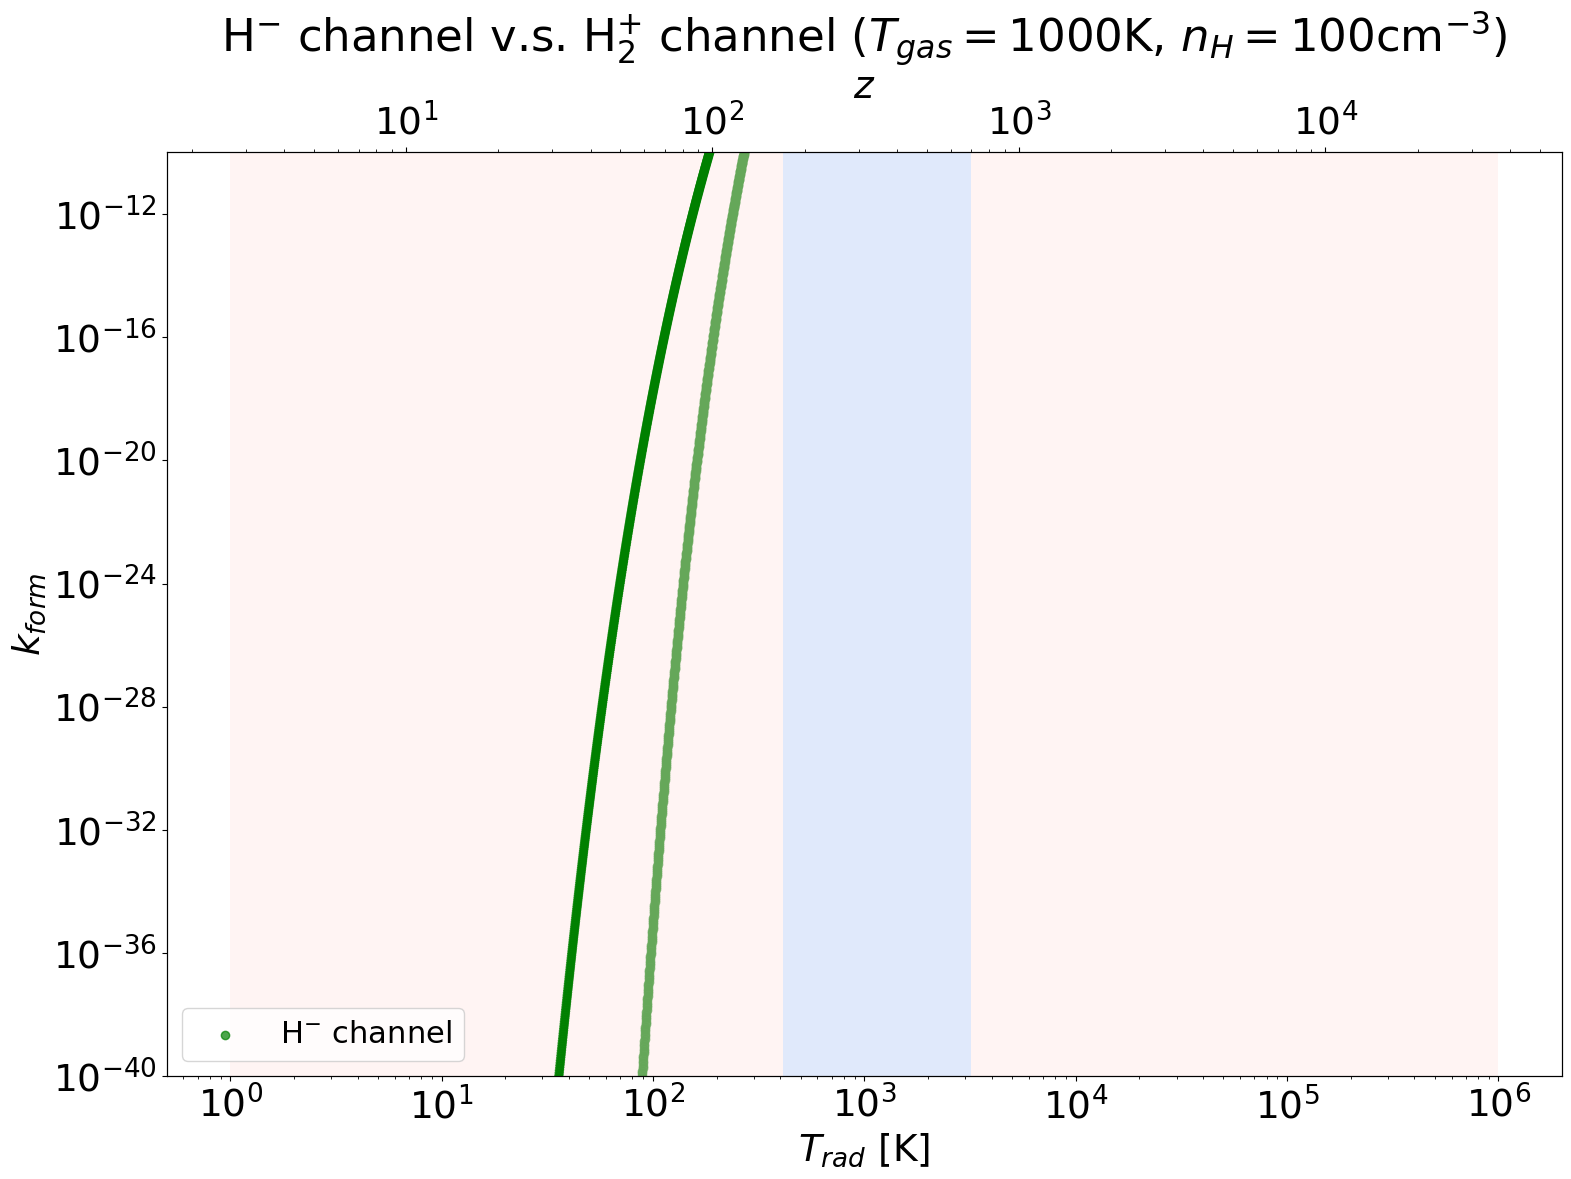

5000 5000
4.5646216587014585 0.4264664910452836 4.1381551676561745
5.0 1.0 4.0


In [73]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 17:32:36 2023
@author: manaito
"""

import numpy as np
import matplotlib.pyplot as plt

#constants
c = 2.998e10 #cgs
h = 6.626e-27 #cgs
k = 1.381e-16 #cgs

# function of z and T_rad
def redshift(Trad):
    z = (Trad/2.725) - 1.0
    return z

#k fitting (Galli & Palla 1998)
#H- channel

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm(Trad):
    f = 1.1e-1 * Trad**2.13 * np.exp(-8823.0/Trad)
    return f

def k2_Hm_Test(z):
    f = 1.1e-1 * (2.725*(z+1.0))**2.13 * np.exp(-8823.0/(2.725*(z+1.0)))
    return f


#T_gas = 100.0
T_gas = np.logspace(1.0, 5.0, 5000)
z1 = np.logspace(1.0, 5.0, 5000)
z_vir = np.zeros(T_rad.size)
for i in range (0, T_rad.size):
    T_gas[i] = 1000.0
    z_vir[i] = redshift(T_rad[i])
    
#z_vir = np.logspace(np.log10(10*redshift(1.0e0)), np.log10(10**redshift(1.0e5)), 5000)


kformHm = np.zeros(T_rad.size)
kformH2p = np.zeros(T_rad.size)
ratio = np.zeros(T_rad.size) #kformHm/kformH2p

nH = 100.0

k2Hm = np.zeros(T_rad.size)
k2Hm_t = np.zeros(T_rad.size)

for i in range(0, T_rad.size):
    k2Hm[i] = k2_Hm(T_rad[i])
    k2Hm_t[i] = k2_Hm_Test(z1[i])

T_crit1 = 1000.0    
for i in range(0, T_rad.size):
    #ratioHm[i] = k1Hm[i]*k3Hm[i]/k2Hm[i]  #この近似だめ
    #ratioH2p[i] = k1H2p[i]*k3H2p[i]/k2H2p[i]   #この近似だめ
    #ratio[i] = ratioHm[i]/ratioH2p[i]   #この近似だめ
    
    kformHm[i] = k1Hm[i]*k3Hm[i]*nH / (k2Hm[i] + (k3Hm[i]*nH))
    kformH2p[i] = k1H2p[i]*k3H2p[i]*nH / (k2H2p[i] + (k3H2p[i]*nH))
    
    ratio[i] = kformHm[i]/kformH2p[i]
    
    if abs(ratio[i] - 1.0) < 1.0e-2:
        T_crit2 = T_rad[i] #大きい方
        if T_rad[i] < T_crit1:
            T_crit1 = T_rad[i] #小さい方
        print(ratio[i])
        print(T_rad[i])
        
print(T_crit1)
print(T_crit2)
print(redshift(T_crit1))
print(redshift(T_crit2))
    
# 2軸グラフ
fig3 = plt.figure(figsize=(18, 12))
plt.rcParams["font.size"] = 27

ax1 = fig3.subplots()
ax2 = ax1.twiny()

ax1.set_xscale("log")
ax1.set_yscale("log")
#ax1.set_xlim(1.0e1, 1.0e5)
ax1.set_ylim(1.0e-40,1.0e-10)
ax1.set_xlabel(r"$T_{rad}$ [K]")
ax1.set_ylabel(r"$k_{form}$")
ax1.scatter(T_rad, k2Hm, color="green", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
ax1.fill_betweenx([1e-60,1e10], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
ax1.fill_betweenx([1e-60,1e10], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
ax1.fill_betweenx([1e-60,1e10], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)

ax2.set_xscale("log")
#ax2.set_xlim(1.0e1, 1.0e5)
ax1.set_ylim(1.0e-40,1.0e-10)
ax2.set_xlabel(r"$z$")
ax2.scatter(z_vir, k2Hm, color="green", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, k2Hm_t color="green", label="", linestyle="dashed", alpha=0.7)


plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
ax1.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=22)
plt.savefig("/Users/maedarn/Desktop/test.jpg")
plt.show()
plt.close()



print(z_vir.size,T_rad.size)
print(np.log10(redshift(1.0e5)), np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)) )
print(np.log10(1.0e5), np.log10(1.0e1), np.log10(1.0e5)- np.log10(1.0e1) )


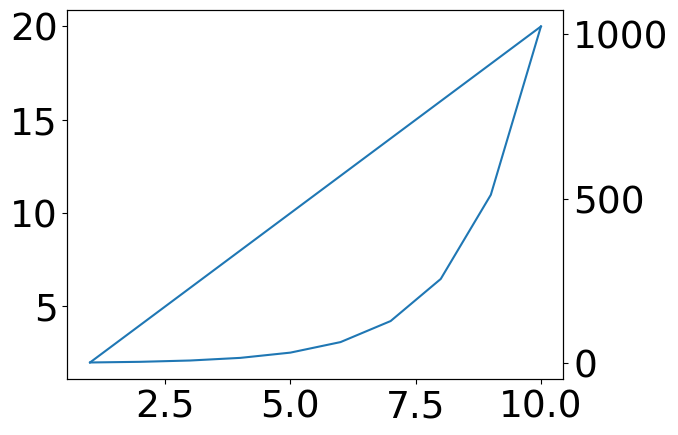

In [69]:
from matplotlib import pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
y2 = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

fig = plt.figure()

ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1)
ax2.plot(x, y2)

plt.show()

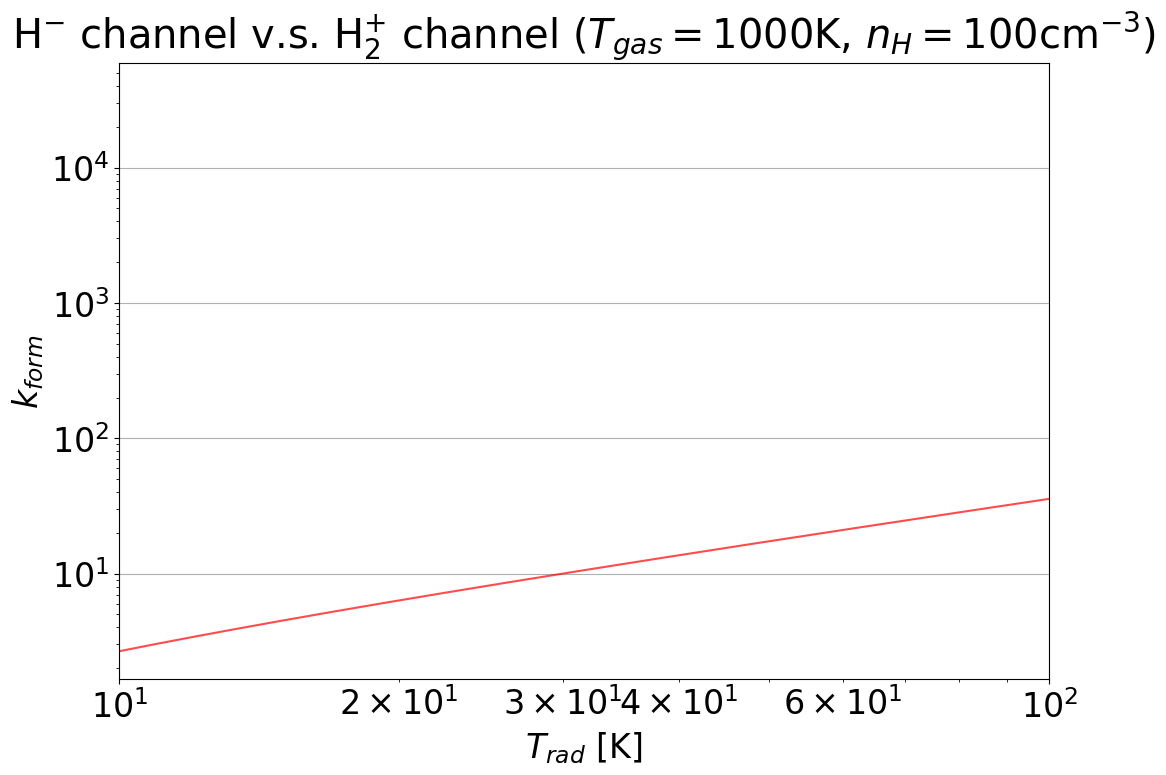

5000 5000
4.5646216587014585 0.4264664910452836 4.1381551676561745
5.0 1.0 4.0


In [83]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 17:32:36 2023
@author: manaito
"""

import numpy as np
import matplotlib.pyplot as plt

# function of z and T_rad
def redshift(Trad):
    z = (Trad/2.725) - 1.0
    return z

def redshift_inv(z):
    Trad=(z + 1.0) * 2.725
    return z

T_gas = np.logspace(1.0, 5.0, 5000)
for i in range (0, T_rad.size):
    T_gas[i] = 1000.0
    z_vir[i] = redshift(T_rad[i])
    

plt.figure(figsize=(12, 8))
plt.rcParams["font.size"] = 24
plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
plt.xlabel(r"$T_{rad}$ [K]")
plt.ylabel(r"$k_{form}$")
plt.xscale("log")
plt.yscale("log")
plt.plot(T_rad, z_vir, color = "red", label = r"H$^{-}$ channel", alpha = 0.7)

plt.xlim(1.0e1,1.0e2)
plt.grid()
plt.savefig("/Users/maedarn/Desktop/compare_kform.jpg")
plt.show()
plt.close()

print(z_vir.size,T_rad.size)
print(np.log10(redshift(1.0e5)), np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)) )
print(np.log10(1.0e5), np.log10(1.0e1), np.log10(1.0e5)- np.log10(1.0e1) )


In [91]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 17:32:36 2023
@author: manaito
"""

import numpy as np
import matplotlib.pyplot as plt

#constants
c = 2.998e10 #cgs
h = 6.626e-27 #cgs
k = 1.381e-16 #cgs

# function of z and T_rad
def redshift(Trad):
    z = (Trad/2.725) - 1.0
    return z

def redshift_inv(z):
    Trad=(z + 1.0) * 2.725
    return z


#k fitting (Galli & Palla 1998)
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm(Tgas):
    f = 1.4e-18 * Tgas**0.928 * np.exp(-Tgas/16200.0)
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm(Trad):
    f = 1.1e-1 * Trad**2.13 * np.exp(-8823.0/Trad)
    return f

def k2_Hm_Test(z):
    f = 1.1e-1 * (2.725*(z-1.0))**2.13 * np.exp(-8823.0/(2.725*(z-1.0)))
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm(Tgas):
    if Tgas <= 300.0:
        f = 1.5e-9
    else:
        f = 4.0e-9 * (Tgas**(-0.17))
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p(Tgas):
    # 1 < Tgas < 32000
    y = -19.38 - ( 1.523*np.log10(Tgas) ) + ( 1.118*np.log10(Tgas)*np.log10(Tgas) ) \
        - ( 0.1269*np.log10(Tgas)*np.log10(Tgas)*np.log10(Tgas) )
    f = 10.0**(y)
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p(Trad):
    if Trad > 21814.671501193974:
        f = 20.0 * (Trad**1.59) * np.exp(-82000.0/Trad)
    else:
        f = 1.63e7 * np.exp(-32400.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p(Tgas):
    f = 6.4e-10
    return f

#T_gas = 100.0
T_gas = np.logspace(1.0, 5.0, 5000)
T_rad = np.logspace(1.0, 5.0, 5000)
#z1 = np.logspace(1.0, 5.0, 5000)
Zsize=int(5000*(np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)))/4)+1
z_vir = np.zeros(Zsize)
z1 = np.logspace(np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5)), Zsize)
#for i in range (0, Zsize):
#   T_gas[i] = 1000.0
#  z_vir[i] = np.log10(redshift(1.0e1))+float(i)
    
#z_vir = np.logspace(np.log10(10*redshift(1.0e0)), np.log10(10**redshift(1.0e5)), 5000)


kformHm = np.zeros(T_rad.size)
kformH2p = np.zeros(T_rad.size)
kformHm_inv = np.zeros(T_rad.size)
kformH2p_inv = np.zeros(T_rad.size)
ratio = np.zeros(T_rad.size) #kformHm/kformH2p

nH = 100.0

k1Hm = np.zeros(T_rad.size)
k2Hm = np.zeros(T_rad.size)
k3Hm = np.zeros(T_rad.size)

k1H2p = np.zeros(T_rad.size)
k2H2p = np.zeros(T_rad.size)
k3H2p = np.zeros(T_rad.size)

for i in range(0, T_rad.size):
    k1Hm[i] = k1_Hm(T_gas[i])
    k2Hm[i] = k2_Hm(T_rad[i])
    #k2Hm_t[i] = k2_Hm_Test(z_vir[i])
    k3Hm[i] = k3_Hm(T_gas[i])
    
    k1H2p[i] = k1_H2p(T_gas[i])
    k2H2p[i] = k2_H2p(T_rad[i])
    k3H2p[i] = k3_H2p(T_gas[i])
    
    k1Hm_inv[i] = k1_Hm(redshift_inv(z1[i]))
    k2Hm_inv[i] = k2_Hm(redshift_inv(z1[i]))
    k3Hm_inv[i] = k3_Hm(redshift_inv(z1[i]))
    
    k1H2p_inv[i] = k1_H2p(redshift_inv(z1[i]))
    k2H2p_inv[i] = k2_H2p(redshift_inv(z1[i]))
    k3H2p_inv[i] = k3_H2p(redshift_inv(z1[i]))
    
    k1Hm_Teg[i] = k1_Hm_Teg(T_gas[i])
    k2Hm_Teg[i] = k2_Hm_Teg(T_rad[i])
    k3Hm_Teg[i] = k3_Hm_Teg(T_gas[i])
    
    k1H2p_Teg[i] = k1_H2p_Teg(T_gas[i])
    k2H2p_Teg[i] = k2_H2p_Teg(T_rad[i])
    k3H2p_Teg[i] = k3_H2p_Teg(T_gas[i])
    
for i in range(0, Zsize):
    k2Hm_t[i] = k2_Hm_Test(z1[i])

T_crit1 = 1000.0    
for i in range(0, T_rad.size):
    #ratioHm[i] = k1Hm[i]*k3Hm[i]/k2Hm[i]  #この近似だめ
    #ratioH2p[i] = k1H2p[i]*k3H2p[i]/k2H2p[i]   #この近似だめ
    #ratio[i] = ratioHm[i]/ratioH2p[i]   #この近似だめ
    
    kformHm[i] = k1Hm[i]*k3Hm[i]*nH / (k2Hm[i] + (k3Hm[i]*nH))
    kformH2p[i] = k1H2p[i]*k3H2p[i]*nH / (k2H2p[i] + (k3H2p[i]*nH))
    
    kformHm_inv[i] = k1Hm_inv[i]*k3Hm_inv[i]*nH / (k2Hm_inv[i] + (k3Hm_inv[i]*nH))
    kformH2p_inv[i] = k1H2p_inv[i]*k3H2p_inv[i]*nH / (k2H2p_inv[i] + (k3H2p_inv[i]*nH))
    
    ratio[i] = kformHm[i]/kformH2p[i]
    
    if abs(ratio[i] - 1.0) < 1.0e-2:
        T_crit2 = T_rad[i] #大きい方
        if T_rad[i] < T_crit1:
            T_crit1 = T_rad[i] #小さい方
        print(ratio[i])
        print(T_rad[i])
        
print(T_crit1)
print(T_crit2)
print(redshift(T_crit1))
print(redshift(T_crit2))
    
# 2軸グラフ
fig3 = plt.figure(figsize=(18, 12))
plt.rcParams["font.size"] = 27

ax1 = fig3.subplots()
ax2 = ax1.twiny()

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1.0e1, 1.0e5)
ax1.set_ylim(1.0e-40,1.0e-10)
ax1.set_xlabel(r"$T_{rad}$ [K]")
ax1.set_ylabel(r"$k_{form}$")
#ax1.plot(T_rad, kformHm, color="red", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
ax1.scatter(T_rad, kformHm_inv, color="green", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p_inv, color="black", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
ax1.vlines(T_crit1, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax1.vlines(T_crit2, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax1.fill_betweenx([1e-60,1e10], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
ax1.fill_betweenx([1e-60,1e10], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
ax1.fill_betweenx([1e-60,1e10], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)

ax2.set_xscale("log")
#ax2.set_xlim(redshift(1.0e1), redshift(1.0e5))
ax1.set_xlim(1.0e1, 1.0e5)
ax2.set_ylim(1.0e-40,1.0e-10)
ax2.set_xlabel(r"$z$")
#ax2.plot(z_vir, kformHm, color="red", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, kformH2p, color="blue", label="", linestyle="dashed", alpha=0.7)
ax2.scatter(z1, kformHm_inv, color="blue", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z1, kformH2p_inv, color="black", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, k2Hm_t color="green", label="", linestyle="dashed", alpha=0.7)
ax2.vlines(redshift(T_crit1), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax2.vlines(redshift(T_crit2), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)

plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
ax1.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=22)
plt.savefig("/Users/maedarn/Desktop/test.jpg")
plt.show()
plt.close()



print(z_vir.size,T_rad.size)
print(np.log10(redshift(1.0e5)), np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)) )
print(np.log10(1.0e5), np.log10(1.0e1), np.log10(1.0e5)- np.log10(1.0e1) )


IndexError: index 5000 is out of bounds for axis 0 with size 5000

Text(0, 0.5, '$y=at+b$')

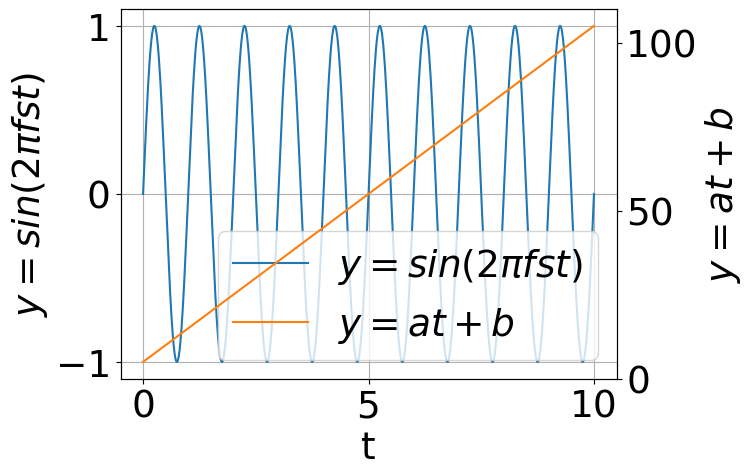

In [87]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
t = np.linspace(0.0,10.0,1000)
fs = 1.0
y1 = np.sin(2.0*np.pi*fs*t)
ln1=ax1.plot(t, y1,'C0',label=r'$y=sin(2\pi fst)$')

ax2 = ax1.twinx()
y2 = 10.0*t + 5.0
ln2=ax2.plot(t,y2,'C1',label=r'$y=at+b$')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

ax1.set_xlabel('t')
ax1.set_ylabel(r'$y=sin(2\pi fst)$')
ax1.grid(True)
ax2.set_ylabel(r'$y=at+b$')


0.9987466045389373
411.83470793619995
0.9901477039832736
3183.4686699244185
0.999807134059808
3189.3394155724304
1.0095354633544766
3195.2209876673237
411.83470793619995
3195.2209876673237
150.13200291236694
1171.558160611862


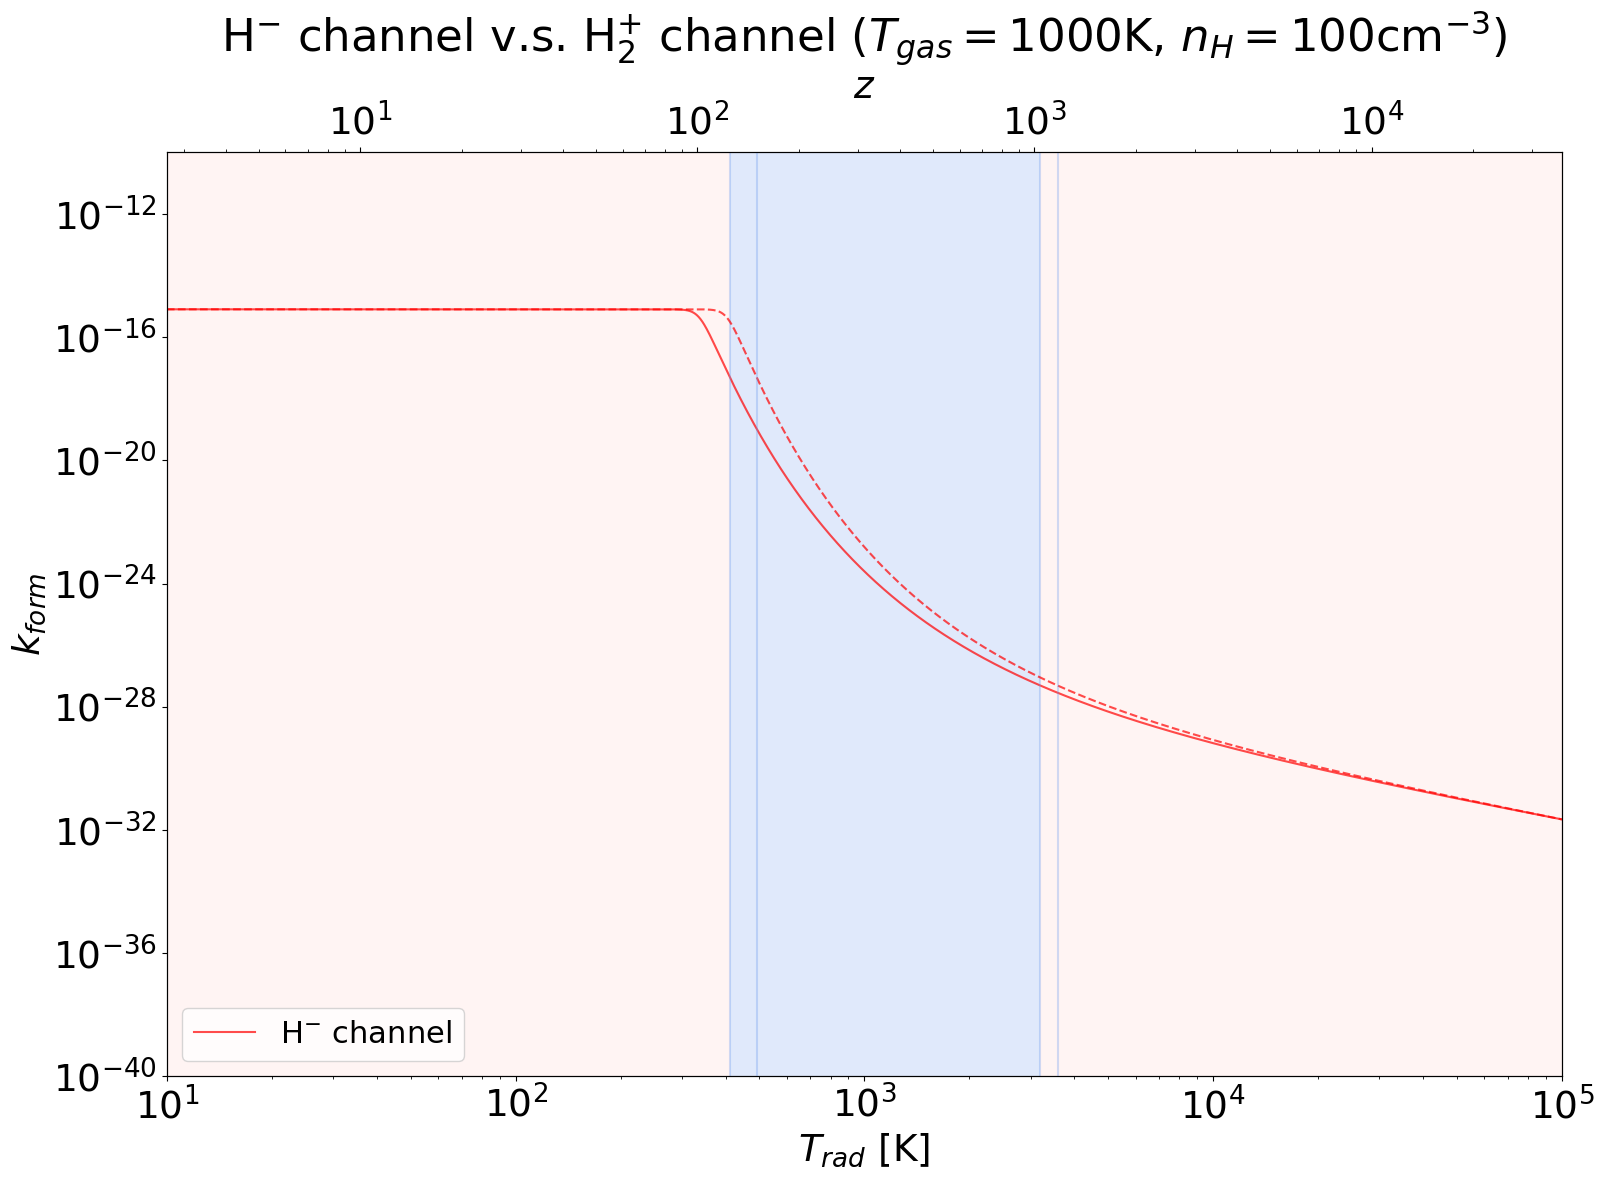

5000 5000
4.5646216587014585 0.4264664910452836 4.1381551676561745
5.0 1.0 4.0


In [93]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  1 17:32:36 2023
@author: manaito
"""

import numpy as np
import matplotlib.pyplot as plt

#constants
c = 2.998e10 #cgs
h = 6.626e-27 #cgs
k = 1.381e-16 #cgs

# function of z and T_rad
def redshift(Trad):
    z = (Trad/2.725) - 1.0
    return z

def redshift_inv(z):
    Trad=(z + 1.0) * 2.725
    return z


#k fitting (Galli & Palla 1998)
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm(Tgas):
    f = 1.4e-18 * Tgas**0.928 * np.exp(-Tgas/16200.0)
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm(Trad):
    f = 1.1e-1 * Trad**2.13 * np.exp(-8823.0/Trad)
    return f

def k2_Hm_Test(z):
    f = 1.1e-1 * (2.725*(z-1.0))**2.13 * np.exp(-8823.0/(2.725*(z-1.0)))
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm(Tgas):
    if Tgas <= 300.0:
        f = 1.5e-9
    else:
        f = 4.0e-9 * (Tgas**(-0.17))
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p(Tgas):
    # 1 < Tgas < 32000
    y = -19.38 - ( 1.523*np.log10(Tgas) ) + ( 1.118*np.log10(Tgas)*np.log10(Tgas) ) \
        - ( 0.1269*np.log10(Tgas)*np.log10(Tgas)*np.log10(Tgas) )
    f = 10.0**(y)
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p(Trad):
    if Trad > 21814.671501193974:
        f = 20.0 * (Trad**1.59) * np.exp(-82000.0/Trad)
    else:
        f = 1.63e7 * np.exp(-32400.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p(Tgas):
    f = 6.4e-10
    return f

#k fitting (Tegmark 1997) 確認用
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm_Teg(Tgas):
    f = 1.83e-18 * Tgas**0.88
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm_Teg(Trad):
    f = 0.114 * Trad**2.13 * np.exp(-8650.0/Trad)
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm_Teg(Tgas):
    f = 1.3e-9
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p_Teg(Tgas):
    f = 1.85e-23 * Tgas**1.8
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p_Teg(Trad):
    f = 6.36e5 * np.exp(-71600.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p_Teg(Tgas):
    f = 6.4e-10
    return f

#T_gas = 100.0
T_gas = np.logspace(1.0, 5.0, 5000)
z_vir = np.zeros(T_rad.size)
for i in range (0, T_rad.size):
    T_gas[i] = 1000.0
    z_vir[i] = redshift(T_rad[i])
    
#z_vir = np.logspace(np.log10(10*redshift(1.0e0)), np.log10(10**redshift(1.0e5)), 5000)


kformHm = np.zeros(T_rad.size)
kformH2p = np.zeros(T_rad.size)
kformHm_inv = np.zeros(T_rad.size)
kformH2p_inv = np.zeros(T_rad.size)
ratio = np.zeros(T_rad.size) #kformHm/kformH2p

nH = 100.0

k1Hm = np.zeros(T_rad.size)
k2Hm = np.zeros(T_rad.size)
k3Hm = np.zeros(T_rad.size)

k1H2p = np.zeros(T_rad.size)
k2H2p = np.zeros(T_rad.size)
k3H2p = np.zeros(T_rad.size)


for i in range(0, T_rad.size):
    k1Hm[i] = k1_Hm(T_gas[i])
    k2Hm[i] = k2_Hm(T_rad[i])
    k2Hm_t[i] = k2_Hm_Test(z_vir[i])
    k3Hm[i] = k3_Hm(T_gas[i])
    
    k1H2p[i] = k1_H2p(T_gas[i])
    k2H2p[i] = k2_H2p(T_rad[i])
    k3H2p[i] = k3_H2p(T_gas[i])

T_crit1 = 1000.0    
for i in range(0, T_rad.size):
    kformHm[i] = k1Hm[i]*k3Hm[i]*nH / (k2Hm[i] + (k3Hm[i]*nH))
    kformH2p[i] = k1H2p[i]*k3H2p[i]*nH / (k2H2p[i] + (k3H2p[i]*nH))
    
    kformHm_inv[i] = k1Hm_inv[i]*k3Hm_inv[i]*nH / (k2Hm_inv[i] + (k3Hm_inv[i]*nH))
    kformH2p_inv[i] = k1H2p_inv[i]*k3H2p_inv[i]*nH / (k2H2p_inv[i] + (k3H2p_inv[i]*nH))
    
    ratio[i] = kformHm[i]/kformH2p[i]
    
    if abs(ratio[i] - 1.0) < 1.0e-2:
        T_crit2 = T_rad[i] #大きい方
        if T_rad[i] < T_crit1:
            T_crit1 = T_rad[i] #小さい方
        print(ratio[i])
        print(T_rad[i])
        
print(T_crit1)
print(T_crit2)
print(redshift(T_crit1))
print(redshift(T_crit2))



# 2軸グラフ
fig3 = plt.figure(figsize=(18, 12))
plt.rcParams["font.size"] = 27

ax1 = fig3.subplots()
ax2 = ax1.twiny()

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1.0e1, 1.0e5)
ax1.set_ylim(1.0e-40,1.0e-10)
ax1.set_xlabel(r"$T_{rad}$ [K]")
ax1.set_ylabel(r"$k_{form}$")
ax1.plot(T_rad, kformHm, color="red", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.scatter(T_rad, kformHm_inv, color="green", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p_inv, color="black", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
ax1.vlines(T_crit1, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax1.vlines(T_crit2, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax1.fill_betweenx([1e-60,1e10], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
ax1.fill_betweenx([1e-60,1e10], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
ax1.fill_betweenx([1e-60,1e10], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)

ax2.set_xscale("log")
ax2.set_xlim(redshift(1.0e1), redshift(1.0e5))
ax2.set_ylim(1.0e-40,1.0e-10)
ax2.set_xlabel(r"$z$")
ax2.plot(z_vir, kformHm, color="red", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, kformH2p, color="blue", label="", linestyle="dashed", alpha=0.7)
#ax2.scatter(z1, kformHm_inv, color="blue", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z1, kformH2p_inv, color="black", label="", linestyle="dashed", alpha=0.7)
#ax2.plot(z_vir, k2Hm_t color="green", label="", linestyle="dashed", alpha=0.7)
ax2.vlines(redshift(T_crit1), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
ax2.vlines(redshift(T_crit2), 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)

plt.title(r"H$^{-}$ channel v.s. H$_{2}^{+}$ channel ($T_{gas}=1000$K, $n_{H}=100$cm$^{-3}$)")
ax1.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=22)
plt.savefig("/Users/maedarn/Desktop/test.jpg")
plt.show()
plt.close()



print(z_vir.size,T_rad.size)
print(np.log10(redshift(1.0e5)), np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)) )
print(np.log10(1.0e5), np.log10(1.0e1), np.log10(1.0e5)- np.log10(1.0e1) )


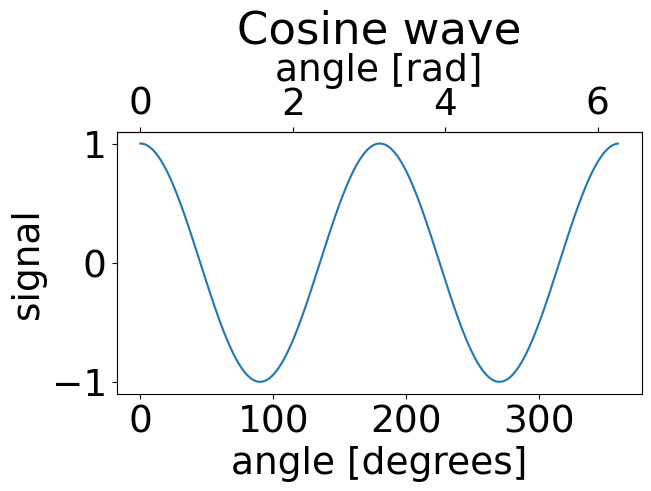

/var/folders/kw/hmy8d3gn14j8321d_1qs3ry40000gn/T/ipykernel_52814/2526631401.py:46: RuntimeWarning: divide by zero encountered in divide
  return 1 / x
/var/folders/kw/hmy8d3gn14j8321d_1qs3ry40000gn/T/ipykernel_52814/2526631401.py:46: RuntimeWarning: divide by zero encountered in divide
  return 1 / x


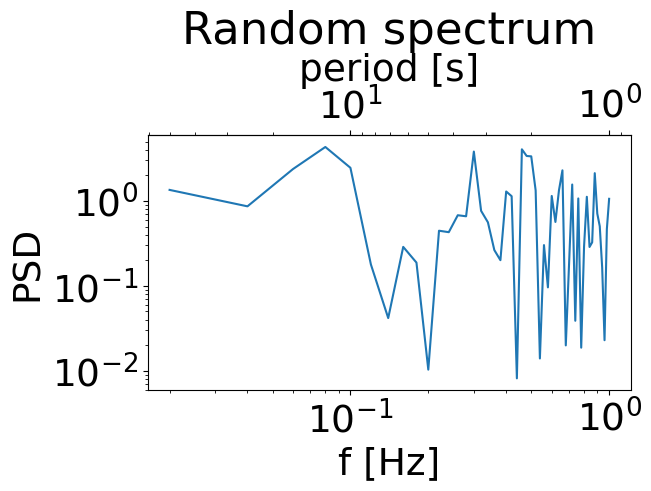

In [98]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0, 360, 1)
y = np.cos(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Cosine wave')


def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi


secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
#plt.savefig('cos_xsecondary.jpg',dpi=100)
plt.show()

fig, ax = plt.subplots(constrained_layout=True)
x = np.linspace(0.02, 1, 50)
y = np.random.randn(len(x)) ** 2
ax.loglog(x, y)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')


def forward(x):
    return 1 / x


def inverse(x):
    return 1 / x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('period [s]')
plt.savefig('random_xsecondary.jpg',dpi=100)
plt.show()

0.9987466045389373
411.83470793619995
0.9901477039832736
3183.4686699244185
0.999807134059808
3189.3394155724304
1.0095354633544766
3195.2209876673237
411.83470793619995
3195.2209876673237
150.13200291236694
1171.558160611862


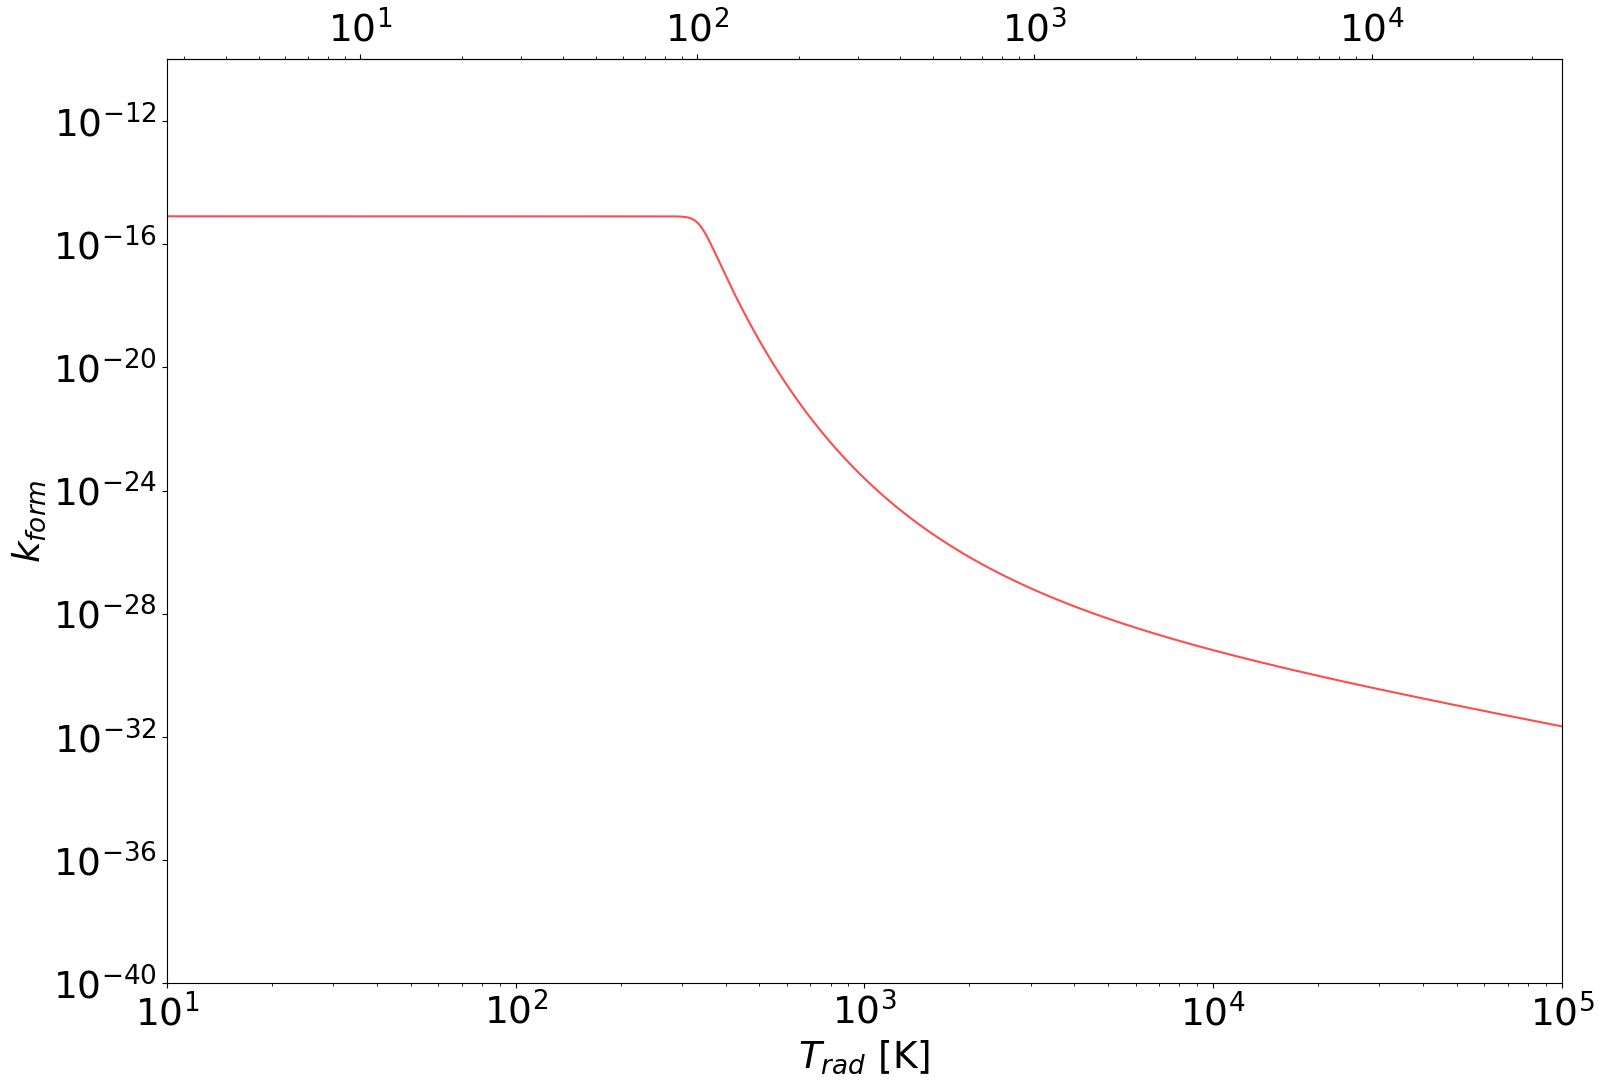

5000 5000
4.5646216587014585 0.4264664910452836 4.1381551676561745
5.0 1.0 4.0


In [99]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

#constants
c = 2.998e10 #cgs
h = 6.626e-27 #cgs
k = 1.381e-16 #cgs

# function of z and T_rad
def redshift(Trad):
    z = (Trad/2.725) - 1.0
    return z

def redshift_inv(z):
    Trad=(z + 1.0) * 2.725
    return z


#k fitting (Galli & Palla 1998)
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm(Tgas):
    f = 1.4e-18 * Tgas**0.928 * np.exp(-Tgas/16200.0)
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm(Trad):
    f = 1.1e-1 * Trad**2.13 * np.exp(-8823.0/Trad)
    return f

def k2_Hm_Test(z):
    f = 1.1e-1 * (2.725*(z-1.0))**2.13 * np.exp(-8823.0/(2.725*(z-1.0)))
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm(Tgas):
    if Tgas <= 300.0:
        f = 1.5e-9
    else:
        f = 4.0e-9 * (Tgas**(-0.17))
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p(Tgas):
    # 1 < Tgas < 32000
    y = -19.38 - ( 1.523*np.log10(Tgas) ) + ( 1.118*np.log10(Tgas)*np.log10(Tgas) ) \
        - ( 0.1269*np.log10(Tgas)*np.log10(Tgas)*np.log10(Tgas) )
    f = 10.0**(y)
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p(Trad):
    if Trad > 21814.671501193974:
        f = 20.0 * (Trad**1.59) * np.exp(-82000.0/Trad)
    else:
        f = 1.63e7 * np.exp(-32400.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p(Tgas):
    f = 6.4e-10
    return f

#k fitting (Tegmark 1997) 確認用
#H- channel
#k1 ( H  +  e  ->  H-  +  ph )
def k1_Hm_Teg(Tgas):
    f = 1.83e-18 * Tgas**0.88
    return f

#k2 ( H-  +  ph  ->  H  +  e )
def k2_Hm_Teg(Trad):
    f = 0.114 * Trad**2.13 * np.exp(-8650.0/Trad)
    return f

#k3 ( H-  +  H  ->  H2  +  e )
def k3_Hm_Teg(Tgas):
    f = 1.3e-9
    return f

#H2+ channel
#k1 ( H  +  H+  ->  H2+  +  ph )
def k1_H2p_Teg(Tgas):
    f = 1.85e-23 * Tgas**1.8
    return f

#k2 ( H2+  +  ph  ->  H  +  H+ )
def k2_H2p_Teg(Trad):
    f = 6.36e5 * np.exp(-71600.0/Trad)
    return f

#k3 ( H2+  +  H  ->  H2  +  H+ )
def k3_H2p_Teg(Tgas):
    f = 6.4e-10
    return f

#T_gas = 100.0
T_gas = np.logspace(1.0, 5.0, 5000)
z_vir = np.zeros(T_rad.size)
for i in range (0, T_rad.size):
    T_gas[i] = 1000.0
    z_vir[i] = redshift(T_rad[i])
    
#z_vir = np.logspace(np.log10(10*redshift(1.0e0)), np.log10(10**redshift(1.0e5)), 5000)


kformHm = np.zeros(T_rad.size)
kformH2p = np.zeros(T_rad.size)
kformHm_inv = np.zeros(T_rad.size)
kformH2p_inv = np.zeros(T_rad.size)
ratio = np.zeros(T_rad.size) #kformHm/kformH2p

nH = 100.0

k1Hm = np.zeros(T_rad.size)
k2Hm = np.zeros(T_rad.size)
k3Hm = np.zeros(T_rad.size)

k1H2p = np.zeros(T_rad.size)
k2H2p = np.zeros(T_rad.size)
k3H2p = np.zeros(T_rad.size)


for i in range(0, T_rad.size):
    k1Hm[i] = k1_Hm(T_gas[i])
    k2Hm[i] = k2_Hm(T_rad[i])
    k2Hm_t[i] = k2_Hm_Test(z_vir[i])
    k3Hm[i] = k3_Hm(T_gas[i])
    
    k1H2p[i] = k1_H2p(T_gas[i])
    k2H2p[i] = k2_H2p(T_rad[i])
    k3H2p[i] = k3_H2p(T_gas[i])

T_crit1 = 1000.0    
for i in range(0, T_rad.size):
    kformHm[i] = k1Hm[i]*k3Hm[i]*nH / (k2Hm[i] + (k3Hm[i]*nH))
    kformH2p[i] = k1H2p[i]*k3H2p[i]*nH / (k2H2p[i] + (k3H2p[i]*nH))
    
    kformHm_inv[i] = k1Hm_inv[i]*k3Hm_inv[i]*nH / (k2Hm_inv[i] + (k3Hm_inv[i]*nH))
    kformH2p_inv[i] = k1H2p_inv[i]*k3H2p_inv[i]*nH / (k2H2p_inv[i] + (k3H2p_inv[i]*nH))
    
    ratio[i] = kformHm[i]/kformH2p[i]
    
    if abs(ratio[i] - 1.0) < 1.0e-2:
        T_crit2 = T_rad[i] #大きい方
        if T_rad[i] < T_crit1:
            T_crit1 = T_rad[i] #小さい方
        print(ratio[i])
        print(T_rad[i])
        
print(T_crit1)
print(T_crit2)
print(redshift(T_crit1))
print(redshift(T_crit2))



# 2軸グラフ
fig3 = plt.figure(figsize=(18, 12))
plt.rcParams["font.size"] = 27

ax1 = fig3.subplots()
#ax2 = ax1.twiny()

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1.0e1, 1.0e5)
ax1.set_ylim(1.0e-40,1.0e-10)
ax1.set_xlabel(r"$T_{rad}$ [K]")
ax1.set_ylabel(r"$k_{form}$")
ax1.plot(T_rad, kformHm, color="red", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.scatter(T_rad, kformHm_inv, color="green", label=r"H$^{-}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p_inv, color="black", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.plot(T_rad, kformH2p, color="blue", label=r"H$_{2}^{+}$ channel", alpha=0.7)
#ax1.vlines(T_crit1, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
#ax1.vlines(T_crit2, 1e-60, 1e10, color="cornflowerblue", linestyle="solid", alpha = 0.3)
#ax1.fill_betweenx([1e-60,1e10], T_crit1, T_crit2, facecolor="cornflowerblue", alpha=0.2)
#ax1.fill_betweenx([1e-60,1e10], 1.0, T_crit1, facecolor="mistyrose", alpha=0.4)
#ax1.fill_betweenx([1e-60,1e10], T_crit2, 1.0e6, facecolor="mistyrose", alpha=0.4)

secax = ax1.secondary_xaxis('top', functions=(redshift, redshift_inv))
#secax.set_xlabel('angle [rad]')

plt.show()
plt.close()



print(z_vir.size,T_rad.size)
print(np.log10(redshift(1.0e5)), np.log10(redshift(1.0e1)), np.log10(redshift(1.0e5))- np.log10(redshift(1.0e1)) )
print(np.log10(1.0e5), np.log10(1.0e1), np.log10(1.0e5)- np.log10(1.0e1) )
